# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Machine Learning com Scikit-Learn</font>

Problema de Negócio:

Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Carregando os Dados

In [2]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


## Análise Exploratória - Resumo Estatístico

In [4]:
# Verifica se há valores ausentes
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [5]:
# Correlação
df.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [6]:
# Resumo estatístico do dataset 
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

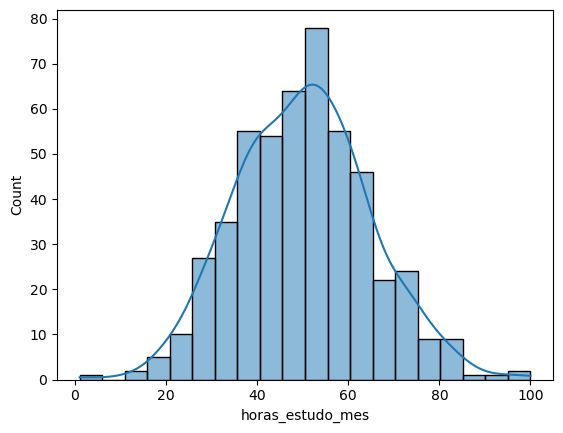

In [7]:
# Histograma da variável preditora
sns.histplot(data = df, x = "horas_estudo_mes", kde = True)

## Preparação dos Dados

In [8]:
# Prepara a variável de entrada X
X = np.array(df['horas_estudo_mes'])
# Ajusta o shape de X
X = X.reshape(-1, 1)
# Prepara a variável alvo
y = df['salario']

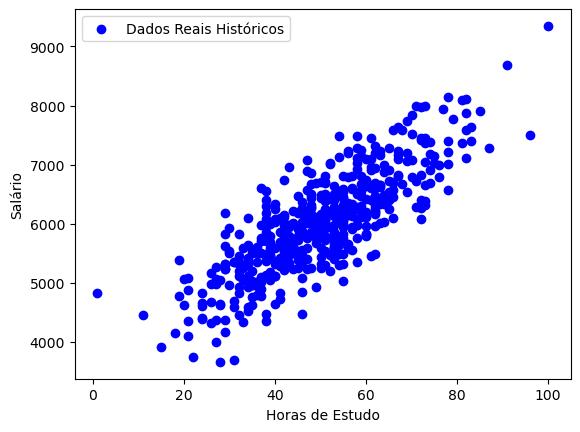

In [9]:
# Gráfico de dispersão entre X e y
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [10]:
# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Modelagem Preditiva (Machine Learning)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [11]:
# Cria o modelo de regressão linear simples
model = LinearRegression()

In [12]:
# Treina o modelo
model.fit(X_train, y_train)

LinearRegression()

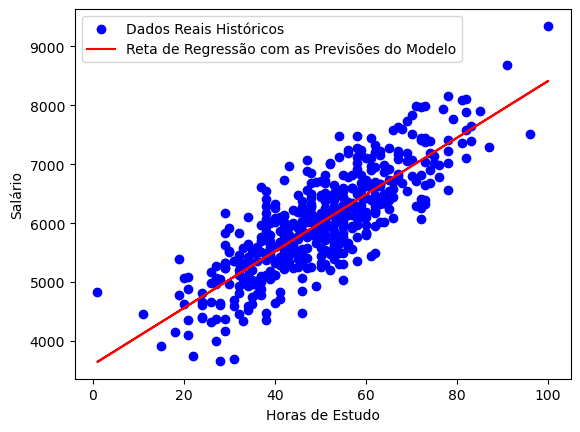

In [13]:
# Visualiza a reta de regressão linear (previsões) e os dados reais usados no treinamento
plt.scatter(X, y, color = "blue", label = "Dados Reais Históricos")
plt.plot(X, model.predict(X), color = "red", label = "Reta de Regressão com as Previsões do Modelo")
plt.xlabel("Horas de Estudo")
plt.ylabel("Salário")
plt.legend()
plt.show()

In [14]:
# Avalia o modelo nos dados de teste
score = model.score(X_test, y_test)
print(f"Coeficiente R^2: {score:.2f}")

Coeficiente R^2: 0.59


In [15]:
# Intercepto - parâmetro w0
model.intercept_

3596.783724372753

In [16]:
# Slope - parâmetro w1
model.coef_

array([48.18185277])

In [17]:
# Faz previsão com o modelo treinado
salario_previsto = model.predict([[48]])
salario_previsto

array([5909.5126574])

# Fim